https://www.sighthound.com/products/cloud

5,000 API Calls (per month?) on developer tier

Note that bounding boxes are specified differently compared to clarifai etc

In [50]:
import requests
import http.client as httplib
import os
import io
import base64
from pprint import PrettyPrinter
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import ssl
import sys
print(sys.version)

ATTR_GENDER_CONFIDENCE = 'gender_confidence'
ATTR_PERSONS = 'persons'
ATTR_TOTAL_PERSONS = 'total_persons'
ATTR_AGE = 'age'
ATTR_CONFIDENCE = 'confidence'
ATTR_FACES = 'faces'
ATTR_GENDER = 'gender'
ATTR_GLASSES = 'glasses'
ATTR_MOTION = 'motion'
ATTR_TOTAL_FACES = 'total_faces'
ATTR_BOUNDING_BOX = 'bounding_box'
ATTR_IMAGE_ID = 'image_id'
ATTR_MATCHED = 'matched'
CLASSIFIER = 'facebox'
TIMEOUT = 9

def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            api_params = json.load(fp)
    except Exception as e:
        print('Failed to load API secrets key: {}'.format(e))
        api_params = None
    return api_params['key']

def print_json(json_data):
    PrettyPrinter().pprint(json_data)
    
def encode_image(image):
    """base64 encode an image stream."""
    base64_img = base64.b64encode(image).decode('ascii')
    return base64_img

def parse_api_response(response):
    """Parse the response from the API. """
    faces = []
    persons = []
    for obj in response.json()['objects']:
        if obj['type'] == 'face':
            faces.append(obj)
        if obj['type'] == 'person':
            persons.append(obj)
    return faces, persons

def parse_faces(api_faces):
    """Parse the API face data into the format required."""
    known_faces = []
    for entry in api_faces:
        face = {}
        face[ATTR_GENDER] = entry['attributes']['gender']
        face[ATTR_GENDER_CONFIDENCE] = round(100.0*entry['attributes']['genderConfidence'], 2)
        face[ATTR_BOUNDING_BOX] = entry['boundingBox']
        known_faces.append(face)
    return known_faces

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
api_key_file_path = '/Users/robincole/Desktop/Sighthound_API_key.json'
api_key = load_api_secrets(api_key_file_path)

In [3]:
headers = {"Content-type": "application/json",
           "X-Access-Token": api_key}

In [4]:
conn = httplib.HTTPSConnection("dev.sighthoundapi.com", 
       context=ssl.SSLContext(ssl.PROTOCOL_TLSv1))

In [5]:
image_file_path = 'people.jpg'

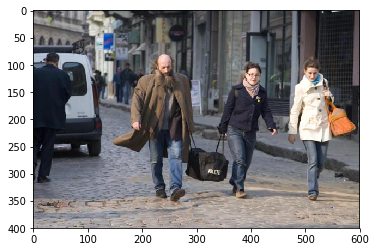

In [6]:
img = plt.imread(image_file_path)  # Creates an ndarray
plt.imshow(img)
plt.show()

In [7]:
image_data = base64.b64encode(open(image_file_path, "rb").read()).decode()

In [8]:
params = json.dumps({"image": image_data})
conn.request("POST", "/v1/detections?type=face,person&faceOption=landmark,gender", params, headers)
response = conn.getresponse()

In [9]:
result = response.read()

In [10]:
print(result)

b'{"image":{"width":600,"height":400,"orientation":1},"objects":[{"type":"person","boundingBox":{"x":339,"y":91,"height":261,"width":113}},{"type":"person","boundingBox":{"x":471,"y":86,"height":269,"width":108}},{"type":"person","boundingBox":{"x":167,"y":77,"height":283,"width":134}},{"type":"person","boundingBox":{"x":1,"y":74,"height":208,"width":71}},{"type":"person","boundingBox":{"x":153,"y":97,"height":87,"width":36}},{"type":"face","boundingBox":{"x":390,"y":107,"height":30,"width":26},"landmarks":{"faceContour":[[390,116],[391,120],[391,123],[392,126],[393,129],[395,132],[398,134],[401,136],[404,137],[407,136],[410,135],[412,133],[414,130],[415,128],[416,125],[416,122],[416,120]],"noseBridge":[[406,118],[406,120],[406,122],[407,124]],"noseBall":[[403,125],[405,125],[406,126],[407,126],[408,125]],"eyebrowRight":[[408,116],[411,115],[413,115],[415,116],[416,117]],"eyebrowLeft":[[395,116],[397,115],[399,114],[402,115],[404,116]],"eyeRight":[[409,119],[411,118],[412,119],[413,119

## Use requests
My other components make use of requests 

In [11]:
url = 'https://dev.sighthoundapi.com/v1/detections'

In [12]:
params = (
    ('type', 'face,person'),
    ('faceOption', 'landmark,gender'),
)


In [13]:
%%time
response = requests.post('https://dev.sighthoundapi.com/v1/detections', 
                         headers=headers, 
                         params=params, 
                         data=json.dumps({"image": image_data}))

CPU times: user 20.1 ms, sys: 5.24 ms, total: 25.4 ms
Wall time: 1.81 s


In [14]:
response.json()

{'image': {'width': 600, 'height': 400, 'orientation': 1},
 'objects': [{'type': 'person',
   'boundingBox': {'x': 339, 'y': 91, 'height': 261, 'width': 113}},
  {'type': 'person',
   'boundingBox': {'x': 471, 'y': 86, 'height': 269, 'width': 108}},
  {'type': 'person',
   'boundingBox': {'x': 167, 'y': 77, 'height': 283, 'width': 134}},
  {'type': 'person',
   'boundingBox': {'x': 1, 'y': 74, 'height': 208, 'width': 71}},
  {'type': 'person',
   'boundingBox': {'x': 153, 'y': 97, 'height': 87, 'width': 36}},
  {'type': 'face',
   'boundingBox': {'x': 390, 'y': 107, 'height': 30, 'width': 26},
   'landmarks': {'faceContour': [[390, 116],
     [391, 120],
     [391, 123],
     [392, 126],
     [393, 129],
     [395, 132],
     [398, 134],
     [401, 136],
     [404, 137],
     [407, 136],
     [410, 135],
     [412, 133],
     [414, 130],
     [415, 128],
     [416, 125],
     [416, 122],
     [416, 120]],
    'noseBridge': [[406, 118], [406, 120], [406, 122], [407, 124]],
    'noseBall

In [15]:
len(response.json()['objects'])

7

In [20]:
persons = []
faces = []

for obj in response.json()['objects']:
    print(obj['type'])
    if obj['type'] == 'person':
        persons.append(obj)    
    if obj['type'] == 'face':
        faces.append(obj)

person
person
person
person
person
face
face


In [22]:
len(faces)

2

In [23]:
len(persons)

5

In [24]:
persons[0]

{'type': 'person',
 'boundingBox': {'x': 339, 'y': 91, 'height': 261, 'width': 113}}

In [18]:
bounding_box  = response.json()['objects'][0]['boundingBox']
bounding_box

{'x': 339, 'y': 91, 'height': 261, 'width': 113}

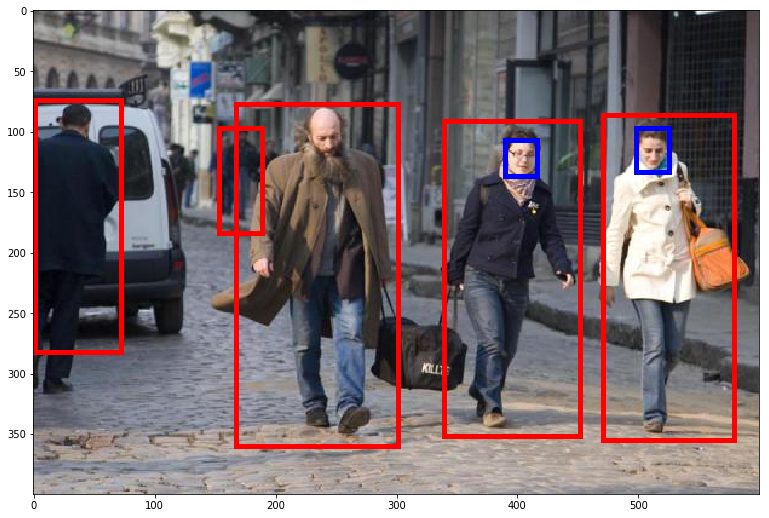

In [19]:
fig,ax = plt.subplots(1, figsize = (13, 18))

# Display the image
ax.imshow(img)

for i, obj in enumerate(response.json()['objects']):
    bounding_box = response.json()['objects'][i]['boundingBox']
    x_orig = bounding_box['x']
    y_orig = bounding_box['y']
    width = bounding_box['width']
    height = bounding_box['height']
    
    if obj['type'] == 'person':
        rect = patches.Rectangle((x_orig,y_orig),width,height,linewidth=5,edgecolor='r',facecolor='none')

    elif obj['type'] == 'face':
        rect = patches.Rectangle((x_orig,y_orig),width,height,linewidth=5,edgecolor='b',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

## Dev 

In [27]:
BASE_URL = "https://dev.sighthoundapi.com/v1/detections"
TIMEOUT = 9
url = BASE_URL
image = open(image_file_path, "rb").read()

response = requests.post(
    url,
    headers=headers,
    params=params,
    data=json.dumps({"image": encode_image(image)}),
    timeout=TIMEOUT
    )

In [31]:
response.json()

{'image': {'width': 600, 'height': 400, 'orientation': 1},
 'objects': [{'type': 'person',
   'boundingBox': {'x': 339, 'y': 91, 'height': 261, 'width': 113}},
  {'type': 'person',
   'boundingBox': {'x': 471, 'y': 86, 'height': 269, 'width': 108}},
  {'type': 'person',
   'boundingBox': {'x': 167, 'y': 77, 'height': 283, 'width': 134}},
  {'type': 'person',
   'boundingBox': {'x': 1, 'y': 74, 'height': 208, 'width': 71}},
  {'type': 'person',
   'boundingBox': {'x': 153, 'y': 97, 'height': 87, 'width': 36}},
  {'type': 'face',
   'boundingBox': {'x': 390, 'y': 107, 'height': 30, 'width': 26},
   'landmarks': {'faceContour': [[390, 116],
     [391, 120],
     [391, 123],
     [392, 126],
     [393, 129],
     [395, 132],
     [398, 134],
     [401, 136],
     [404, 137],
     [407, 136],
     [410, 135],
     [412, 133],
     [414, 130],
     [415, 128],
     [416, 125],
     [416, 122],
     [416, 120]],
    'noseBridge': [[406, 118], [406, 120], [406, 122], [407, 124]],
    'noseBall

In [35]:
response.status_code == 200

True

In [37]:
faces, persons = parse_api_response(response)

In [52]:
persons

[{'type': 'person',
  'boundingBox': {'x': 339, 'y': 91, 'height': 261, 'width': 113}},
 {'type': 'person',
  'boundingBox': {'x': 471, 'y': 86, 'height': 269, 'width': 108}},
 {'type': 'person',
  'boundingBox': {'x': 167, 'y': 77, 'height': 283, 'width': 134}},
 {'type': 'person',
  'boundingBox': {'x': 1, 'y': 74, 'height': 208, 'width': 71}},
 {'type': 'person',
  'boundingBox': {'x': 153, 'y': 97, 'height': 87, 'width': 36}}]

In [56]:
def parse_persons(api_persons):
    """Parse the API person data into the format required."""
    known_persons = []
    for entry in api_persons:
        person = {}
        person[ATTR_BOUNDING_BOX] = entry['boundingBox'] 
        known_persons.append(person)
    return known_persons

In [57]:
known_persons = parse_persons(persons)

In [58]:
known_persons

[{'bounding_box': {'x': 339, 'y': 91, 'height': 261, 'width': 113}},
 {'bounding_box': {'x': 471, 'y': 86, 'height': 269, 'width': 108}},
 {'bounding_box': {'x': 167, 'y': 77, 'height': 283, 'width': 134}},
 {'bounding_box': {'x': 1, 'y': 74, 'height': 208, 'width': 71}},
 {'bounding_box': {'x': 153, 'y': 97, 'height': 87, 'width': 36}}]